In [15]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from datetime import datetime
from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from scipy import interpolate
import warnings

In [2]:
warnings.filterwarnings('ignore')

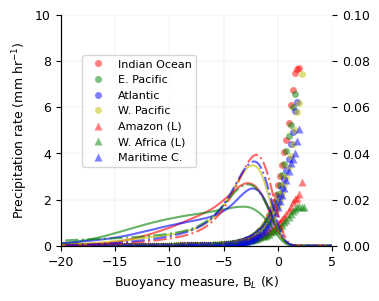

In [3]:
### 1. buoyancy-precip 1-D: all grids, MCS grids, non-MCS grids 

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2002,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.All.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

cond_prec = prec_sum/samples
prob = samples/samples.sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 

ax2 = ax.twinx() # for PDF
for reg,color in zip(['IND','EPC','ATL','WPC'], ['r','g','b','y']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), 'o', color=color, markeredgecolor='none', ls='None', ms=5, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-', color=color, alpha=0.6)
    ax2.set_ylim([0,0.05])
    ax2.tick_params(labelsize=9)

for reg,color in zip(['AMZ','WAF','MC'], ['r','g','b']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), '^', color=color, markeredgecolor='none', ls='None', ms=6, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-.', color=color, alpha=0.6)
    ax2.set_ylim([0,0.1])
    ax2.tick_params(labelsize=9)

ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
ax.legend(['Indian Ocean','E. Pacific', 'Atlantic','W. Pacific', 'Amazon (L)', 'W. Africa (L)', 'Maritime C.'],
           bbox_to_anchor=(0.02, 0.35, 0.5, 0.5),fontsize=8, frameon=True)
#ax.text(x=-18, y=8.7, s='C.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-6.5, y=8.7, s='All grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_All.png',dpi=600,
      bbox_inches='tight', transparent=False)

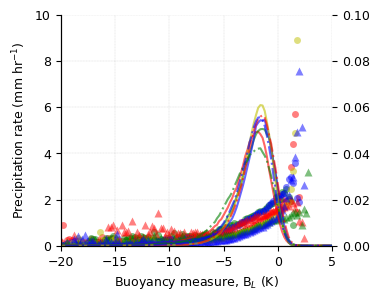

In [4]:
### 1. buoyancy-precip 1-D: all grids, MCS grids, non-MCS grids 

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2002,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCS.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

cond_prec = prec_sum/samples
prob = samples/samples.sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 

ax2 = ax.twinx() # for PDF
for reg,color in zip(['IND','EPC','ATL','WPC'], ['r','g','b','y']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), 'o', color=color, markeredgecolor='none', ls='None', ms=5, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-', color=color, alpha=0.6)

for reg,color in zip(['AMZ','WAF','MC'], ['r','g','b']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), '^', color=color, markeredgecolor='none', ls='None', ms=6, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-.', color=color, alpha=0.6)

ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)
ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')

#ax.text(x=-18, y=8.7, s='C.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-6.5, y=8.7, s='Non-MCS grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

#fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_nonMCS.Tb241.png',dpi=600,
#       bbox_inches='tight', transparent=False)

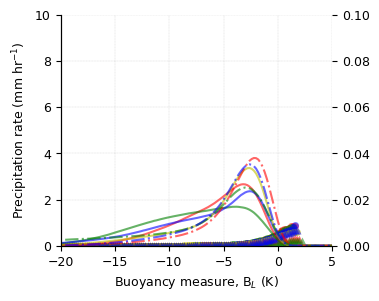

In [7]:
### 1. buoyancy-precip 1-D: all grids, MCS grids, non-MCS grids 

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2002,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCSshallow.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

cond_prec = prec_sum/samples
prob = samples/samples.sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)
# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 

ax2 = ax.twinx() # for PDF
for reg,color in zip(['IND','EPC','ATL','WPC'], ['r','g','b','y']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), 'o', color=color, markeredgecolor='none', ls='None', ms=5, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-', color=color, alpha=0.6)

for reg,color in zip(['AMZ','WAF','MC'], ['r','g','b']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), '^', color=color, markeredgecolor='none', ls='None', ms=6, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-.', color=color, alpha=0.6)

ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)
ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()
#fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_nonMCSshallow.Tb241.png',dpi=600,
#      bbox_inches='tight', transparent=False)

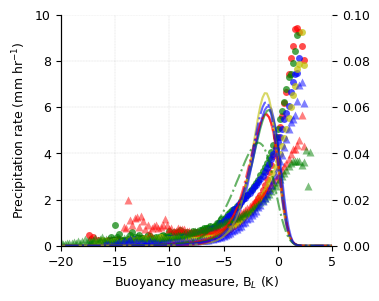

In [15]:
### 1. buoyancy-precip 1-D: all grids, MCS grids, non-MCS grids 

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2002,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.MCS.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

cond_prec = prec_sum/samples
prob = samples/samples.sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 

ax2 = ax.twinx() # for PDF
for reg,color in zip(['IND','EPC','ATL','WPC'], ['r','g','b','y']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), 'o', color=color, markeredgecolor='none', ls='None', ms=5, 
        alpha=0.7, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-', color=color, alpha=0.6)
    ax2.set_ylim([0,0.1])
    ax2.tick_params(labelsize=9)

for reg,color in zip(['AMZ','WAF','MC'], ['r','g','b']):

    ax.plot(data_all.BL_bins, cond_prec.sel(region=reg), '^', color=color, markeredgecolor='none', ls='None', ms=6, 
        alpha=0.5, label=reg)
    ax2.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-.', color=color, alpha=0.6)
    ax2.set_ylim([0,0.1])
    ax2.tick_params(labelsize=9)

# ins = ax.inset_axes([0.16,0.28,0.35,0.3])
# for reg,color in zip(['IND','EPC','ATL','WPC'], ['r','g','b','y']):

#     ins.plot(data_all.BL_bins, cond_prec.sel(region=reg), 'o', color=color, markeredgecolor='none', ls='None', ms=5, 
#         alpha=0.7, label=reg)
#     ins.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-', color=color, alpha=0.6)

# for reg,color in zip(['AMZ','WAF','MC'], ['r','g','b']):

#     ins.plot(data_all.BL_bins, cond_prec.sel(region=reg), '^', color=color, markeredgecolor='none', ls='None', ms=6, 
#         alpha=0.5, label=reg)
#     ins.plot(data_all.BL_bins, samples.sel(region=reg)/samples.sel(region=reg).sum(), '-.', color=color, alpha=0.6)

# ins.grid(lw=0.5,ls=':')
# ins.set_xlim([-20,-5])
# ins.set_ylim([0,1])
# ins.tick_params(labelsize=7)

ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
#ax.legend(['Indian Ocean','E. Pacific', 'Atlantic','W. Pacific', 'Amazon (L)', 'W. Africa (L)', 'Maritime C.'],
#           bbox_to_anchor=(0.02, 0.35, 0.5, 0.5),fontsize=8, frameon=True)

#ax.text(x=-18, y=8.7, s='D.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-5, y=8.7, s='MCS grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_MCS.Tb241.png',dpi=600,
       bbox_inches='tight', transparent=False)

#### Merging oceanic regions into one, same for land regions

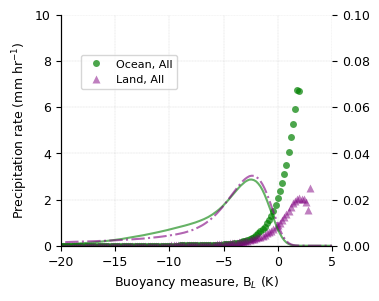

In [29]:
### 1. buoyancy-precip 1-D: merged ocean regions into one, as well as for land regions

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2011,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.All.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

# ocean 
cond_prec = prec_sum.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')
prob = samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-5)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 
ax2 = ax.twinx() # for PDF
ax.plot(data_all.BL_bins, cond_prec, 'og', color='g', markeredgecolor='none', ls='None', ms=5, 
    alpha=0.7, label=reg)
ax2.plot(data_all.BL_bins, prob, '-', color='g', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

cond_prec = prec_sum.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum('region')
prob = samples.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

ax.plot(data_all.BL_bins, cond_prec, '^r', color='purple', markeredgecolor='none', ls='None', ms=6, 
    alpha=0.5, label=reg)
ax2.plot(data_all.BL_bins, prob, '-.', color='purple', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
ax.legend(['Ocean, All','Land, All'],
          bbox_to_anchor=(-0.05, 0.35, 0.5, 0.5),fontsize=8, frameon=True)

#ax.text(x=-18, y=8.7, s='D.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-5, y=8.7, s='MCS grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_All.mergedOCE.png',dpi=600,
      bbox_inches='tight', transparent=False)

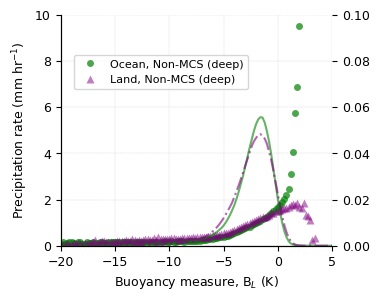

In [20]:
### 1. buoyancy-precip 1-D: merged ocean regions into one, as well as for land regions

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2011,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCS.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

# ocean 
cond_prec = prec_sum.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')
prob = samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-5)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 
ax2 = ax.twinx() # for PDF
ax.plot(data_all.BL_bins, cond_prec, 'og', color='g', markeredgecolor='none', ls='None', ms=5, 
    alpha=0.7, label=reg)
ax2.plot(data_all.BL_bins, prob, '-', color='g', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

cond_prec = prec_sum.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum('region')
prob = samples.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

ax.plot(data_all.BL_bins, cond_prec, '^r', color='purple', markeredgecolor='none', ls='None', ms=6, 
    alpha=0.5, label=reg)
ax2.plot(data_all.BL_bins, prob, '-.', color='purple', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
ax.legend(['Ocean, Non-MCS (deep)','Land, Non-MCS (deep)'],
          bbox_to_anchor=(0.21, 0.35, 0.5, 0.5),fontsize=8, frameon=True)

#ax.text(x=-18, y=8.7, s='D.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-5, y=8.7, s='MCS grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_nonMCS.Tb241.mergedOCE.png',dpi=600,
      bbox_inches='tight', transparent=False)

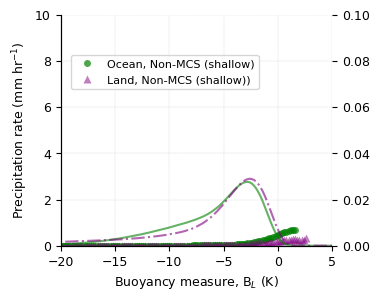

In [18]:
### 1. buoyancy-precip 1-D: merged ocean regions into one, as well as for land regions

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2011,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCSshallow.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

# ocean 
cond_prec = prec_sum.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')
prob = samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-5)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 
ax2 = ax.twinx() # for PDF
ax.plot(data_all.BL_bins, cond_prec, 'og', color='g', markeredgecolor='none', ls='None', ms=5, 
    alpha=0.7, label=reg)
ax2.plot(data_all.BL_bins, prob, '-', color='g', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

cond_prec = prec_sum.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum('region')
prob = samples.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

ax.plot(data_all.BL_bins, cond_prec, '^r', color='purple', markeredgecolor='none', ls='None', ms=6, 
    alpha=0.5, label=reg)
ax2.plot(data_all.BL_bins, prob, '-.', color='purple', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
ax.legend(['Ocean, Non-MCS (shallow)','Land, Non-MCS (shallow))'],
          bbox_to_anchor=(0.25, 0.35, 0.5, 0.5),fontsize=8, frameon=True)

#ax.text(x=-18, y=8.7, s='D.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-5, y=8.7, s='MCS grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_nonMCSshallow.Tb241.mergedOCE.png',dpi=600,
      bbox_inches='tight', transparent=False)

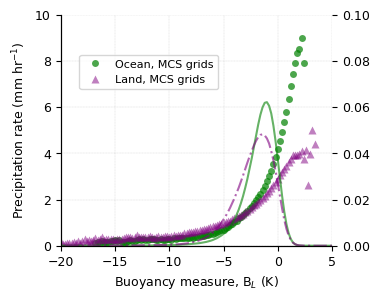

In [31]:
### 1. buoyancy-precip 1-D: merged ocean regions into one, as well as for land regions

### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2002,2015)):
    data_all = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.MCS.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples = data_all.samples
        prec_sum = data_all.prec_gpm_sum
    else:
        tmp = data_all.samples
        tmp2 = data_all.prec_gpm_sum
        samples += tmp
        prec_sum += tmp2

# ocean 
cond_prec = prec_sum.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')
prob = samples.sel(region=['IND','EPC','ATL','WPC']).sum('region')/samples.sel(region=['IND','EPC','ATL','WPC']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-5)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 
ax2 = ax.twinx() # for PDF
ax.plot(data_all.BL_bins, cond_prec, 'og', color='g', markeredgecolor='none', ls='None', ms=5, 
    alpha=0.7, label=reg)
ax2.plot(data_all.BL_bins, prob, '-', color='g', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

cond_prec = prec_sum.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum('region')
prob = samples.sel(region=['WAF','AMZ']).sum('region')/samples.sel(region=['WAF','AMZ']).sum()
# masking out under-sampled values
cond_prec = cond_prec.where(prob > 1e-6)

ax.plot(data_all.BL_bins, cond_prec, '^r', color='purple', markeredgecolor='none', ls='None', ms=6, 
    alpha=0.5, label=reg)
ax2.plot(data_all.BL_bins, prob, '-.', color='purple', alpha=0.6)
ax2.set_ylim([0,0.1])
ax2.tick_params(labelsize=9)

ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,10])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
ax.legend(['Ocean, MCS grids','Land, MCS grids'],
          bbox_to_anchor=(0.1, 0.35, 0.5, 0.5),fontsize=8, frameon=True)

#ax.text(x=-18, y=8.7, s='D.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.5, lw=0.5))
#ax.text(x=-5, y=8.7, s='MCS grids', fontsize=10, fontweight='bold',
#        bbox=dict(facecolor='w', edgecolor='grey', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

#fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_buoyPrec_MCS.Tb241.mergedOCE.png',dpi=600,
#      bbox_inches='tight', transparent=False)

In [3]:
### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2011,2015)):

    data_nonmcs = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCS.Tb241.{}.nc'.format(year))
    data_mcs = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.MCS.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples_nonmcs = data_nonmcs.samples
        prec_sum_nonmcs = data_nonmcs.prec_gpm_sum
        samples_mcs = data_mcs.samples
        prec_sum_mcs = data_mcs.prec_gpm_sum
    else:
        tmp = data_nonmcs.samples
        tmp2 = data_nonmcs.prec_gpm_sum
        samples_nonmcs += tmp
        prec_sum_nonmcs += tmp2

        tmp3 = data_mcs.samples
        tmp4 = data_mcs.prec_gpm_sum
        samples_mcs += tmp3
        prec_sum_mcs += tmp4

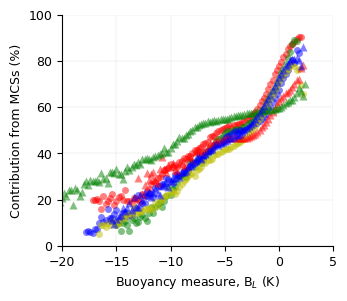

In [7]:
### 1. buoyancy-precip 1-D: all grids, MCS grids, non-MCS grids 
fraction_mcs = samples_mcs/(samples_mcs + samples_nonmcs)
fraction_mcs = fraction_mcs.where(samples_mcs+samples_nonmcs >200)

# ###### plotting #######
fig,ax = plt.subplots(1,1,figsize=(3.5,3)) 

for reg,color in zip(['IND','EPC','ATL','WPC'], ['r','g','b','y']):

    ax.plot(fraction_mcs.BL_bins, 100*fraction_mcs.sel(region=reg), 'o', color=color, markeredgecolor='none', ls='None', ms=5, 
        alpha=0.5, label=reg)

for reg,color in zip(['AMZ','WAF','MC'], ['r','g','b']):

    ax.plot(fraction_mcs.BL_bins, 100*fraction_mcs.sel(region=reg), '^', color=color, markeredgecolor='none', ls='None', ms=6, 
        alpha=0.5, label=reg)

ax.set_ylabel('Contribution from MCSs (%)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.set_ylim([0,100])
ax.set_xlim([-20,5])
ax.grid(lw=0.2,ls=':',color='grey')
#ax.legend(['Indian Ocean','E. Pacific', 'Atlantic','W. Pacific', 'Amazon (L)', 'W. Africa (L)', 'Maritime C.'],
#           bbox_to_anchor=(0.02, 0.35, 0.5, 0.5),fontsize=8, frameon=True)

#ax.text(x=-18, y=87, s='E.', fontsize=15, fontweight='bold',
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.5, lw=0.5))
ax.spines[['right', 'top']].set_visible(False)

plt.show()

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_MCSBLcontribution.new.png', dpi=600,
       bbox_inches='tight', transparent=False)

#### Combine all three types of condtions: MCS, non-MCS shallow, non-MCS deep

In [34]:
### get B-P data of all grids ####
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/buoy_precip_1D_multiregions')
for n,year in enumerate(np.arange(2011,2015)):

    data_nonmcs_deep = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCS.Tb241.{}.nc'.format(year))
    data_nonmcs_shallow = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.nonMCSshallow.Tb241.{}.nc'.format(year))
    data_mcs = xr.open_dataset(out_dir / 'buoy_precipitation_multiregions.MCS.Tb241.{}.nc'.format(year))
    # for all grids (using a subsat)
    if n == 0:
        samples_nonmcs_deep = data_nonmcs_deep.samples.sum('region')
        samples_nonmcs_shallow = data_nonmcs_shallow.samples.sum('region')
        samples_mcs = data_mcs.samples.sum('region')
    else:
        samples_mcs += data_mcs.samples.sum('region')
        samples_nonmcs_deep += data_nonmcs_deep.samples.sum('region')
        samples_nonmcs_shallow += data_nonmcs_shallow.samples.sum('region')

In [36]:
samples_all = samples_mcs + samples_nonmcs_deep + samples_nonmcs_shallow
mcs_frac = samples_mcs/samples_all
nonmcs_deep_frac = samples_nonmcs_deep/samples_all
nonmcs_shallow_frac = samples_nonmcs_shallow/samples_all

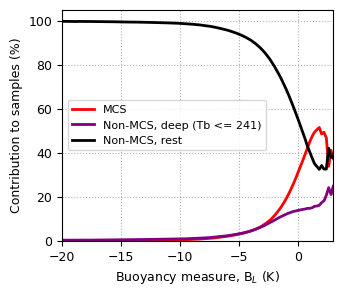

In [53]:
fig,ax = plt.subplots(1,1,figsize=(3.5,3))

ax.plot(data_mcs.BL_bins, 100*mcs_frac, color='r',lw=2)
ax.plot(data_mcs.BL_bins, 100*nonmcs_deep_frac, color='purple', lw=2)
ax.plot(data_mcs.BL_bins, 100*nonmcs_shallow_frac, color='k', lw=2)
ax.set_xlim([-20,3])
ax.set_ylim([0,105])
ax.set_ylabel('Contribution to samples (%)',fontsize=9)
ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9)
ax.tick_params(labelsize=9)
ax.legend(['MCS','Non-MCS, deep (Tb <= 241)','Non-MCS, rest'],fontsize=8)
ax.grid(ls=':')

fig.savefig('/scratch/wmtsai/temp_mcs/fig/Fig1_BLcontribution.condtypes.png', dpi=600,
       bbox_inches='tight', transparent=False)